In [15]:
#first import the needed libraries 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from matplotlib import rcParams

In [16]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)

In [17]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [18]:

df_clean = df.copy()
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

df_clean['start_station_id'] = df_clean.start_station_id.astype('str')
df_clean['end_station_id'] = df_clean.end_station_id.astype('str')
df_clean['bike_id'] = df_clean.bike_id.astype('str')

df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')


In [19]:
# here i got the age of the users from the member_birth_year
df_clean['member_age'] = 2020 - df_clean['member_birth_year']
df_clean.member_age.value_counts()

32.0     10236
27.0      9325
31.0      8972
30.0      8658
29.0      8498
         ...  
110.0        1
142.0        1
93.0         1
92.0         1
90.0         1
Name: member_age, Length: 75, dtype: int64

In [20]:
# make a new column to count the duration in minutes,day of the week,month

df_clean['duration_minute'] = df_clean['duration_sec']/60

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hourofday'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_dayofweek'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

In [21]:
# we have user over 65 so i filter them out
df_clean = df_clean.query('member_age <= 65')
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int')
df_clean['member_age'] = df_clean['member_age'].astype('int')

In [22]:
df_clean = df_clean.query('duration_minute <= 60')

In [23]:
base_color = sb.color_palette()[0]
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

 ### (Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018

# usage of bike and rush hour during the day 

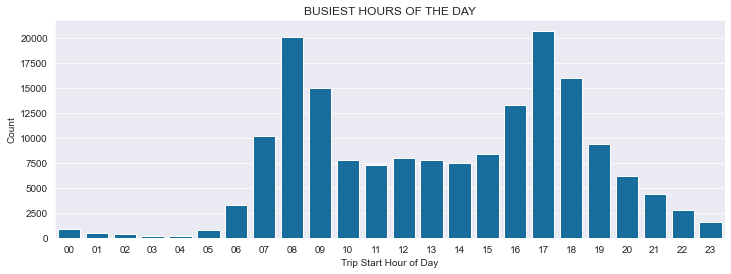

In [24]:
hide_code_in_slideshow()
# build plot to see which hour of the day is the rush hour

plt.rcParams['figure.figsize'] = 12,4
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
sb.countplot(data = df_clean, x = 'start_hourofday',color = base_color);
plt.title('BUSIEST HOURS OF THE DAY')
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

# usage of bikes during the week
**we can see that the usage drop during weekend which mean that poeple use it to work mainly**

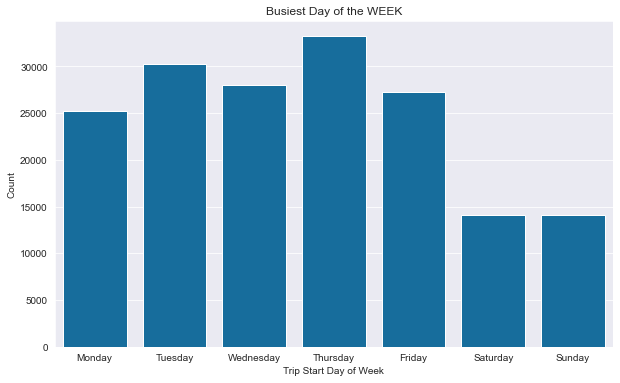

In [25]:
hide_code_in_slideshow()
# doing the same to see weekdays 
plt.rcParams['figure.figsize'] = 10,6

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_categories = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_dayofweek'] = df_clean['start_dayofweek'].astype(weekdays_categories)

sb.countplot(data=df_clean, x='start_dayofweek', color=base_color);
plt.title('Busiest Day of the WEEK')
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

### numbers of trip durations

we can see the different between customer and subsscriber and also different in gender, we can see that male in general trip duration shorter and cusromer use the bokes for longer time

<Figure size 504x216 with 0 Axes>

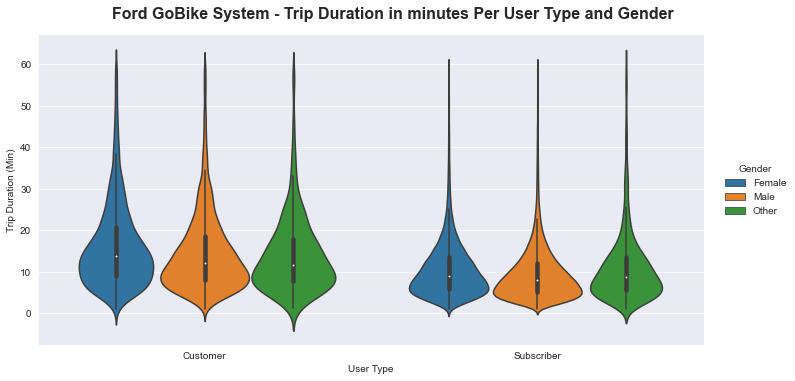

In [26]:
hide_code_in_slideshow()
# Violinplot - duration (min) per user type and gender
plt.figure(figsize = [7, 3])

graph = sb.catplot(data=df_clean, x='user_type', y="duration_minute", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration in minutes Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

#### Average Weekday Trip Duration for Customers and Subscribers
Subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types had an obvious increase of trip duration on Saturdays and Sundays (or weekends), especially casual customers. Subscriber usage was more efficient than customers overall and maintained a pretty consistent average duration Monday through Friday.

**here i tried to see the relationship between the Day of Week,Avg. Trip Duration in Minute and the user was customer or subscriber**


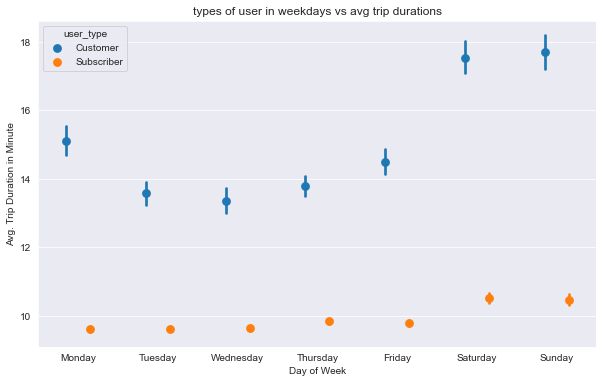

In [30]:
hide_code_in_slideshow()
sb.pointplot(data=df_clean, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.title('types of user in weekdays vs avg trip durations')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
print('**here i tried to see the relationship between the Day of Week,Avg. Trip Duration in Minute and the user was customer or subscriber**')

# Findings in our data 
The number of trips peaked around 8-9am and 17-18pm during a day, there were more trips on work days (Mon-Fri) compared to weekends, the trip duration is longer in weekends vs working days 
most of riders is male and most of customer age between 20 and 37 years old,male rider tend to have shorter trips compared to female users.

number of subscriber is higer than customer, customer tend to have longer rides than subscriber , we also can see that their are rush our between 7 am to 9 am and between 4 pm to 7 pm from that we can see that most of user use the bike for going and come back from work


### Key Insights for Presentation

their are different in usage and patterns between our cumtomer, subscriber use the service more during working day and less in weekends, customer use it more on weekends and for longer times, we also can say that most user like to use the bike in short trips like 5 to 15 min, we also can see that most of subscriber use the service for work, also the ride duration is longer in weekends that may be due to user use it for fun
most of user is male and they like to have short trip durations
